# **AC \#1**: Inteligência Artificial
Facens - Sorocaba

Prof. Adson Nogueira Alves

E-mail adson.alves@facens.br



In [6]:
# TODO: RA & Name
print('200065: ' + 'Nathan Roberto Gonçalves dos Santos')

200065: Nathan Roberto Gonçalves dos Santos


## Objetivo: Prever as taxas de mortalidade por câncer para os condados dos EUA.

Explore alternativas de **regressão linear** e desenvolva o melhor modelo possível para os problemas, evitando o overfitting. Em particular, preveja a **TARGET_deathRate** a partir de seus atributos.

## Conjunto de Dados

Esses dados foram agregados de várias fontes, incluindo o American Community Survey (census.gov), clinicaltrials.gov e cancer.gov.

O conjunto de dados contém a taxa de mortalidade e os atributos de 3.047 condados.

Informações do Conjunto de Dados: Você deve respeitar a seguinte divisão treino/teste: 2042 exemplos de treino e 305 exemplos de teste.

Existem 33 atributos, conforme segue:

Dicionário de Dados

1: avgAnnCount: Número médio de casos reportados de câncer diagnosticados anualmente (a)

2: avgDeathsPerYear: Número médio de mortes reportadas devido ao câncer (a)

3: incidenceRate: Taxa média de diagnósticos de câncer per capita (100.000) (a)

4: medianIncome: Renda média por condado (b)

5: popEst2015: População do condado (b)

6: povertyPercent: Percentual da população em situação de pobreza (b)

7: studyPerCap: Número per capita de ensaios clínicos relacionados ao câncer por condado (a)

8: binnedInc: Renda média per capita agrupada por decil (b)

9: MedianAge: Idade média dos residentes do condado (b)

10: MedianAgeMale: Idade média dos residentes masculinos do condado (b)

11: MedianAgeFemale: Idade média dos residentes femininos do condado (b)

12: Geography: Nome do condado (b)

13: AvgHouseholdSize: Tamanho médio dos lares no condado (b)

14: PercentMarried: Percentual de residentes do condado casados (b)

15: PctNoHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o ensino médio ou menos (b)

16: PctHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de ensino médio (b)

17: PctSomeCol18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram algum nível de educação universitária (b)

18: PctBachDeg18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de bacharel (b)

19: PctHS25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de ensino médio (b)

20: PctBachDeg25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de bacharel (b)

21: PctEmployed16_Over: Percentual de residentes do condado com idades acima de 16 anos empregados (b)

22: PctUnemployed16_Over: Percentual de residentes do condado com idades acima de 16 anos desempregados (b)

23: PctPrivateCoverage: Percentual de residentes do condado com cobertura de saúde privada (b)

24: PctPrivateCoverageAlone: Percentual de residentes do condado com cobertura de saúde privada apenas (sem assistência pública) (b)

25: PctEmpPrivCoverage: Percentual de residentes do condado com cobertura de saúde privada fornecida por empregador (b)

26: PctPublicCoverage: Percentual de residentes do condado com cobertura de saúde pública (b)

27: PctPubliceCoverageAlone: Percentual de residentes do condado com cobertura de saúde pública apenas (b)

28: PctWhite: Percentual de residentes do condado que se identificam como brancos (b)

29: PctBlack: Percentual de residentes do condado que se identificam como negros (b)

30: PctAsian: Percentual de residentes do condado que se identificam como asiáticos (b)

31: PctOtherRace: Percentual de residentes do condado que se identificam como pertencentes a outras etnias que não brancos, negros ou asiáticos (b)

32: PctMarriedHouseholds: Percentual de lares casados (b)

33: BirthRate: Número de nascimentos vivos relativo ao número de mulheres no condado (b)

TARGET_deathRate: Variável dependente. Taxa média de mortalidade por câncer per capita (100.000) (a)

(a): anos de 2010 a 2016

(b): Estimativas do Censo de 2013

Os dados estão disponíveis em:

treino: https://docs.google.com/spreadsheets/d/1mglppL3qIhx5Osp2wsoENN3HPnGpzkcaFpw7i9nsTvQ/edit?usp=sharing

teste: https://docs.google.com/spreadsheets/d/1AuNcBH2c7hDEE1WScZIcbiH16fTr66C19S29d5uGnfo/edit?usp=sharing

## Atividades

1. (5 pontos) Realize a Regressão Linear. Você deve implementar alguma solução e compará-la com o sklearn.linear_model.SGDRegressor (modelo linear ajustado minimizando uma perda empírica regularizada com SGD, http://scikit-learn.org).

**Nota: Alguns fatores a considerar: Existem outliers? Há valores faltantes? Como você lidará com variáveis categóricas?**

Regressão Linear - MSE: 324.323, RMSE: 18.009, MAE: 13.579, R²: 0.451
SGDRegressor - MSE: 341.137, RMSE: 18.470, MAE: 13.834, R²: 0.422


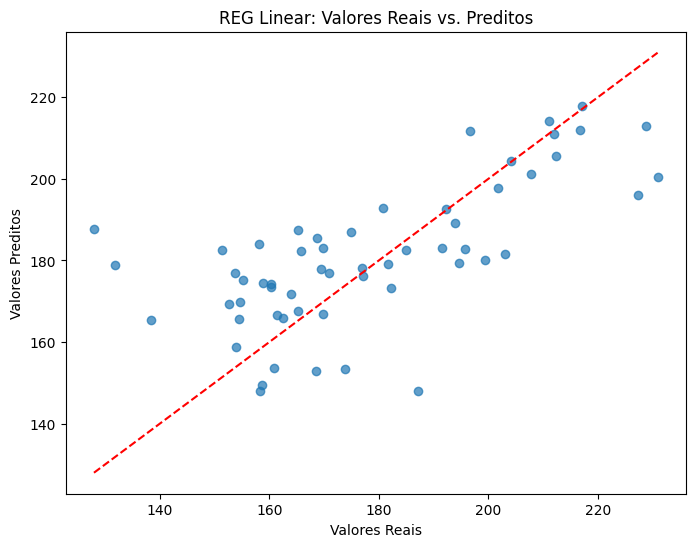

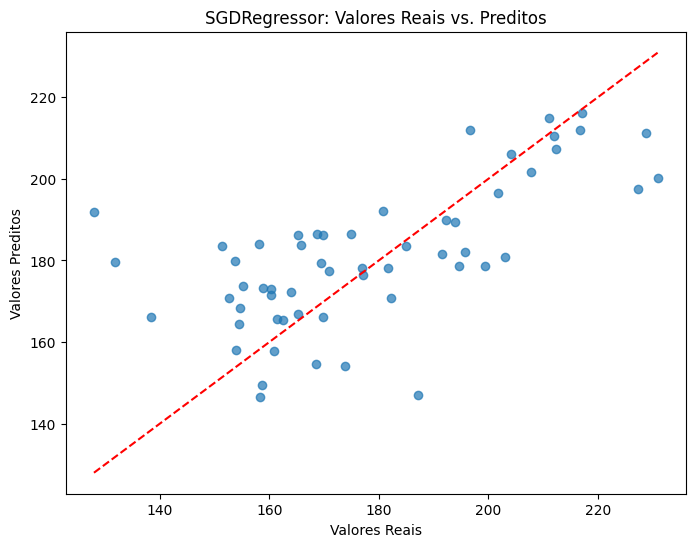

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. Carregar os dados
train_df = pd.read_csv("data-trainAc1.csv")
test_df = pd.read_csv("data-testAc1.csv")

# Remover registros com valores faltantes
train_df = train_df.dropna()
test_df = test_df.dropna()

# Separar a variável alvo e os atributos
X_train = train_df.drop(columns=["target_deathrate", "geography"])
y_train = train_df["target_deathrate"]

X_test = test_df.drop(columns=["target_deathrate", "geography"])
y_test = test_df["target_deathrate"]

# 2. Pré-processamento
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

# 3. Modelagem com Regressão Linear Clássica
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# 4. Modelagem com SGDRegressor seguindo a documentação oficial
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', alpha=0.0001, random_state=42)

pipeline_sgd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', sgd_regressor)
])

pipeline_sgd.fit(X_train, y_train)
y_pred_sgd = pipeline_sgd.predict(X_test)

# 5. Avaliação dos Modelos
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

print_metrics(y_test, y_pred_lr, "Regressão Linear")
print_metrics(y_test, y_pred_sgd, "SGDRegressor")

# 6. Visualização dos resultados do melhor modelo (exemplo com REG Linear)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("REG Linear: Valores Reais vs. Preditos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# 7. Visualização dos resultados do melhor modelo (exemplo com SGDRegressor)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sgd, alpha=0.7)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("SGDRegressor: Valores Reais vs. Preditos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


## Conclusões Atividade 1

Quais são as conclusões? (1-2 parágrafos)




*Coloque sua resposta aqui ...*

2. (2 pontos) Utilize 3 diferentes taxas de aprendizado de Gradiente Descendente (GD) ao otimizar. Compare as soluções baseadas em GD com a Equação Normal. Quais são as conclusões?


3. (3 pontos) Às vezes, precisamos de uma função mais complexa para fazer boas previsões. Elabore e avalie um modelo de Regressão Linear Polinomial.


## Conclusões Atividades 2 e 3

Quais são as conclusões? (1-2 parágrafos)


*Coloque sua resposta aqui ...*

## Resultados com o Conjunto de Dados de Teste


In [8]:
# seu codigo

In [9]:
# Linear Model with SDGRegressor


In [10]:
# Polynomial model with SDGRegressor


## Prazo

Terça-feira, 01 de abril, às 23h59.

Política de penalização para envio atrasado: Não é encorajado o envio de sua tarefa após a data de vencimento. No entanto, caso você o faça, sua nota será penalizada da seguinte forma:

02 de abril, 23h59: nota * 0,75
03 de abril, 23h59: nota * 0,5
04 de abril, 23h59: nota * 0,25
Após: nota * 0


## Envio

Por e-mail adson.alves@facens.br, envie seu Notebook.

Esta atividade é individual.